## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

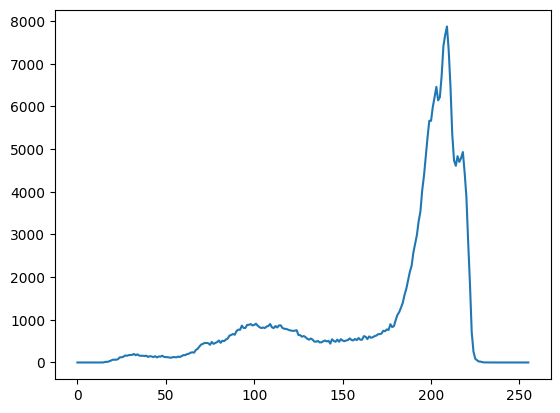

In [2]:
img = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.gray()
plt.plot(hist)
plt.show()

In [3]:
mean_brightness = round(cv2.mean(img)[0])
mean_brightness

178

In [4]:
H1 = []
H2 = []
for i in range(256):
    if i <= mean_brightness:
        H1.append(hist[i])
        H2.append([0])
    else:
        H1.append([0])
        H2.append(hist[i])
H1 = np.array(H1)
H2 = np.array(H2)

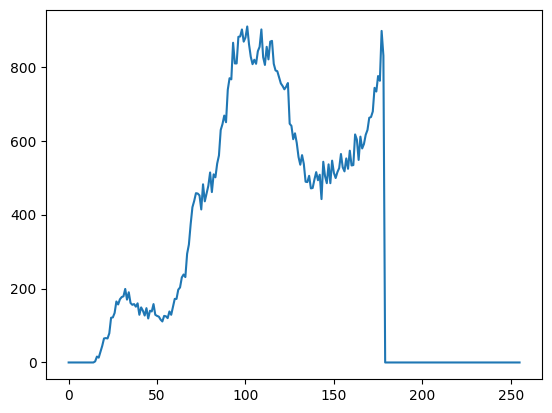

In [5]:
plt.plot(H1)
plt.show()

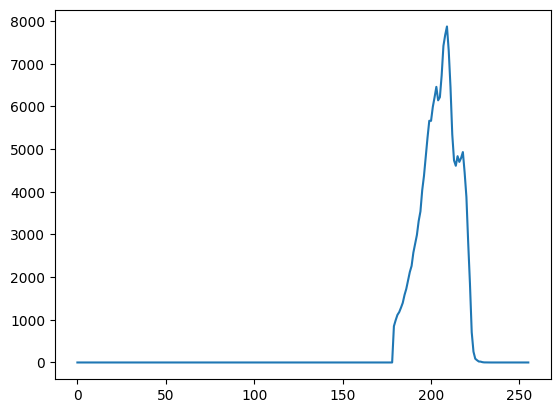

In [6]:
plt.plot(H2)
plt.show()

In [7]:
CH1 = H1.cumsum()
CH2 = H2.cumsum()
CH1 = np.ma.masked_equal(CH1, 0)
CH2 = np.ma.masked_equal(CH2, 0)
CH1 = CH1 / np.max(CH1)
CH2 = CH2 / np.max(CH2)
CH1 = CH1 * mean_brightness
CH2 = mean_brightness + 1 + (255 - mean_brightness - 1) * CH2
CH1 = np.ma.filled(CH1, fill_value=0)
CH2 = np.ma.filled(CH2, fill_value=0)

In [8]:
lut_table = []
for i in range(256):
    if i <= mean_brightness:
        lut_table.append(CH1[i])
    else:
        lut_table.append(CH2[i])
lut_table = np.array(lut_table)

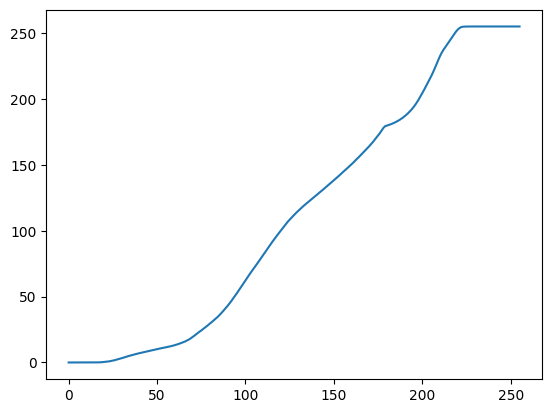

In [9]:
plt.plot(lut_table)
plt.show()

In [10]:
new_img = cv2.LUT(img, lut_table).astype("uint8")

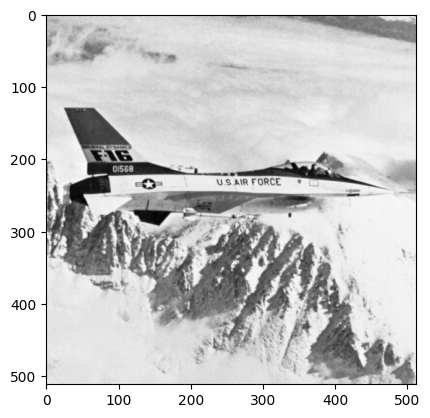

In [11]:
plt.imshow(img)
plt.show()

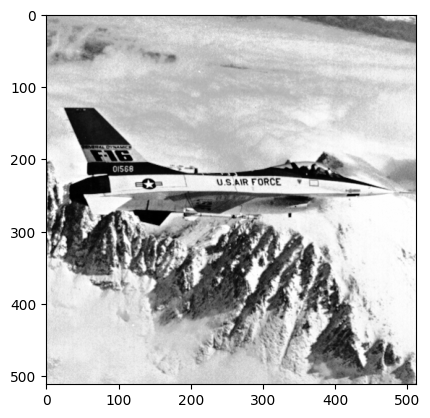

In [12]:
plt.imshow(new_img)
plt.show()

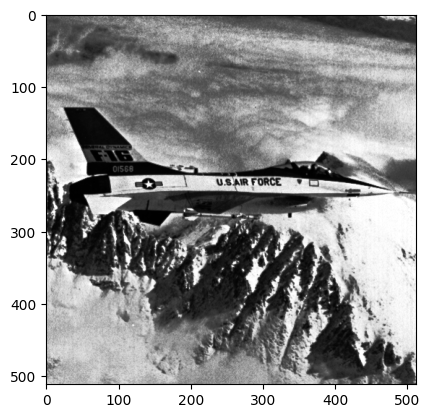

In [13]:
equalized = cv2.equalizeHist(img)
plt.imshow(equalized)
plt.show()